<a href="https://colab.research.google.com/github/qweliant/DS-Unit-2-Applied-Modeling/blob/master/module1/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA

In [0]:
url = "https://raw.githubusercontent.com/qweliant/Lambda_lmbk/master/lmbk_data.csv?token=AII7DUJCLGGEUQQFH6T4E2K5WGIRM"

df = pd.read_csv(url)
df['recorded_at'] = pd.to_datetime(df.recorded_at)
lmbk = df.copy()


In [6]:
df.head()

,Unnamed: 0,id,stress_level,readable_stress_level,created_at,user_id,recorded_at
0,0,52722,-2.0,4,2018-09-03 23:36:22.986072+00:00,76,2018-09-01 04:00:00+00:00
1,1,52723,-1.0,4,2018-09-03 23:36:22.992042+00:00,76,2018-09-01 04:03:00+00:00
2,2,52724,12.0,4,2018-09-03 23:36:22.997334+00:00,76,2018-09-01 04:06:00+00:00
3,3,52725,19.0,4,2018-09-03 23:36:23.002467+00:00,76,2018-09-01 04:09:00+00:00
4,4,52726,11.0,4,2018-09-03 23:36:23.007704+00:00,76,2018-09-01 04:12:00+00:00


In [7]:
df.readable_stress_level.value_counts()

4    737626
Name: readable_stress_level, dtype: int64

In [8]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
stress_level                         float64
readable_stress_level                  int64
created_at                            object
user_id                                int64
recorded_at              datetime64[ns, UTC]
dtype: object

In [9]:
lmbk.user_id.value_counts()

46     189073
66     184840
77     141245
73      61819
72      55336
79      48686
76      27442
89      21359
120      7826
Name: user_id, dtype: int64

In [0]:
lmbk_1 = lmbk[lmbk['user_id'] == 46]
lmbk_2 = lmbk[lmbk['user_id'] == 66]
lmbk_3 = lmbk[lmbk['user_id'] == 77]
lmbk_4 = lmbk[lmbk['user_id'] == 73]
lmbk_5 = lmbk[lmbk['user_id'] == 72]
lmbk_6 = lmbk[lmbk['user_id'] == 79]
lmbk_7 = lmbk[lmbk['user_id'] == 76]
lmbk_8 = lmbk[lmbk['user_id'] == 89]
lmbk_9 = lmbk[lmbk['user_id'] == 120]

In [11]:
lmbk_1.shape, lmbk_2.shape, lmbk_3.shape, lmbk_4.shape, lmbk_5.shape, lmbk_6.shape, lmbk_7.shape, lmbk_8.shape, lmbk_9.shape

((189073, 7),
 (184840, 7),
 (141245, 7),
 (61819, 7),
 (55336, 7),
 (48686, 7),
 (27442, 7),
 (21359, 7),
 (7826, 7))

In [0]:
def drop_col(frame, cols):
    frame = frame.copy()
    frame.drop(cols, axis=1, inplace=True)
    return frame

In [13]:
lmbk_1.head()

,Unnamed: 0,id,stress_level,readable_stress_level,created_at,user_id,recorded_at
727,727,53449,44.0,4,2018-09-03 23:36:28.998336+00:00,46,2018-09-01 04:00:00+00:00
728,728,53450,37.0,4,2018-09-03 23:36:29.007056+00:00,46,2018-09-01 04:03:00+00:00
729,729,53451,43.0,4,2018-09-03 23:36:29.017413+00:00,46,2018-09-01 04:06:00+00:00
730,730,53452,-1.0,4,2018-09-03 23:36:29.024082+00:00,46,2018-09-01 04:09:00+00:00
731,731,53453,-1.0,4,2018-09-03 23:36:29.029620+00:00,46,2018-09-01 04:12:00+00:00


In [0]:
lmbk_1 = drop_col(lmbk_1, ['Unnamed: 0','created_at', 'id', 'readable_stress_level', 'user_id'])

In [0]:
col = ['Unnamed: 0','created_at', 'id', 'readable_stress_level', 'user_id']

In [0]:
lmbk_1 = lmbk_1.set_index('recorded_at')

In [21]:
lmbk_1.head()

,stress_level
recorded_at,
2018-09-01 04:00:00+00:00,44.0
2018-09-01 04:03:00+00:00,37.0
2018-09-01 04:06:00+00:00,43.0
2018-09-01 04:09:00+00:00,-1.0
2018-09-01 04:12:00+00:00,-1.0


In [0]:
sns.set(rc={'figure.figsize':(11,4)})

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


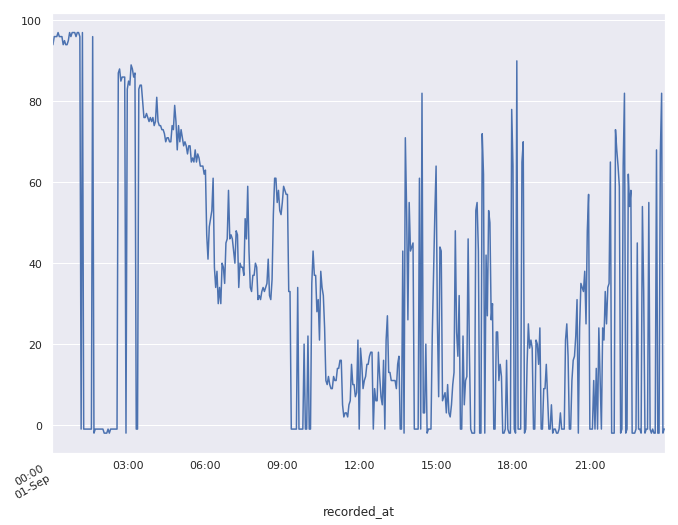

In [20]:
axes = lmbk_1['stress_level'].loc['2019-09-01'].plot( figsize=(11, 9), subplots=True)

In [0]:
# lmbk_1.to_csv('user_data.csv', index=True)

In [0]:
# from google.colab import files

# files.download('user_data.csv')

In [0]:
# url_to_read = "https://raw.githubusercontent.com/qweliant/Lambda_lmbk/master/user_data.csv?token=AII7DUJPRYBY35EITIJGUYC5WGO44"

# series = read_csv(url_to_read, squeeze=True, date_parser=parser)

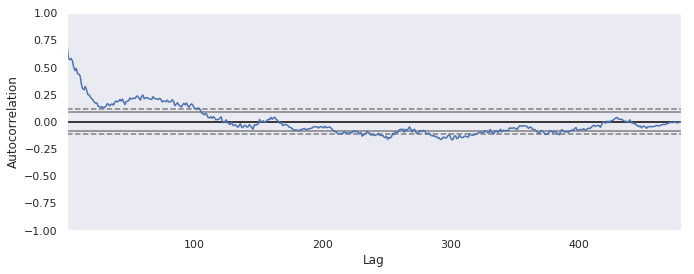

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(lmbk_1['stress_level'].loc['2019-09-01'])